# Data Understanding

In [2]:
import re
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
users = pd.read_csv("dataset/users.csv", index_col=0)

In [4]:
users.head()

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [5]:
users.shape

(11508, 5)

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [7]:
users.index.dtype

dtype('int64')

In [8]:
print("Number of different users' indexes", len(set(users.index)))

Number of different users' indexes 11508


## Name

show the records with Null names

In [9]:
users[users.name.isna()]

,name,lang,bot,created_at,statuses_count
id,,,,,
2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


In [10]:
users.loc[users.name.isna(), "name"] = "No Name"

## Lang

In [11]:
null_lang_ids = users.lang.isna()

print(np.sum(null_lang_ids))

0


In [12]:
users.lang.unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

In [13]:
len(users.lang.unique())

26

In [14]:
users.lang.value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

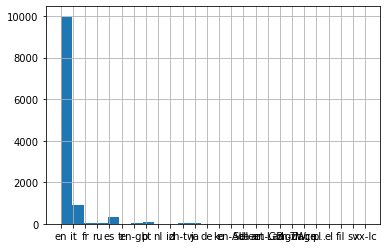

In [15]:
users.lang.hist(bins=26)
plt.show()

In [16]:
# clean lang feature, remove lang id that are not correct

# remove dialectic specialization

def remove_specialization(sample):
    radix = sample.split("-")[0]
    return radix

users.lang = users.lang.apply(remove_specialization)

print(users.lang.value_counts())

en                    10025
it                      906
es                      319
pt                       65
ru                       42
fr                       36
ja                       33
zh                       21
tr                       14
id                       12
ko                        9
de                        8
nl                        6
ar                        3
da                        2
Select Language...        2
pl                        1
el                        1
fil                       1
sv                        1
xx                        1
Name: lang, dtype: int64


In [17]:
# "Select Language..." to "en"
users.loc[users.lang == "Select Language...", "lang"] = "en"

# "xx" to "en"
users.loc[users.lang == "xx", "lang"] = "en"

In [18]:
print(users.lang.value_counts())

en     10028
it       906
es       319
pt        65
ru        42
fr        36
ja        33
zh        21
tr        14
id        12
ko         9
de         8
nl         6
ar         3
da         2
pl         1
el         1
fil        1
sv         1
Name: lang, dtype: int64


## Bot

In [19]:
na_bot_ids = users.bot.isna()
print("Number of Nan Bot: ", np.sum(na_bot_ids))

Number of Nan Bot:  0


In [20]:
users.bot.unique()

array([1, 0])

In [21]:
users.bot.value_counts()

1    6116
0    5392
Name: bot, dtype: int64

## Created_at

In [22]:
na_created_at_ids = users.created_at.isna()
print("Number of Nan created_at: ", np.sum(na_created_at_ids))

Number of Nan created_at:  0


In [23]:
try:
    pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    # do something
    print("All the dates are ok!")
except ValueError as e:
    print(e)


All the dates are ok!


In [24]:
users.created_at.min()

'2012-01-24 01:57:38'

In [25]:
users.created_at.max()

'2020-04-21 07:28:31'

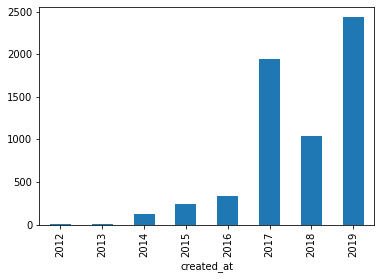

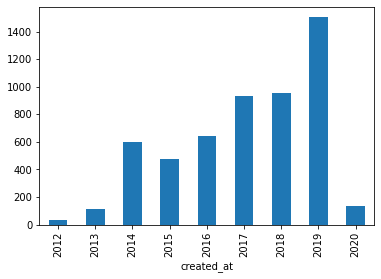

In [26]:
# TODO: aggiustare plot

users[users.bot == 1].name.groupby(pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise').dt.year).count().plot(kind="bar")
plt.show()

users[users.bot == 0].name.groupby(pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise').dt.year).count().plot(kind="bar")
plt.show()

## Statuses_count

In [27]:
null_statuses_count_ids = users.statuses_count.isna()

print("number of nan statuses counts: ", np.sum(null_statuses_count_ids))

number of nan statuses counts:  399


In [28]:
users.statuses_count[~null_statuses_count_ids].describe()

count     11109.000000
mean       5883.312359
std       19073.007305
min           0.000000
25%          41.000000
50%          68.000000
75%        2916.000000
max      399555.000000
Name: statuses_count, dtype: float64

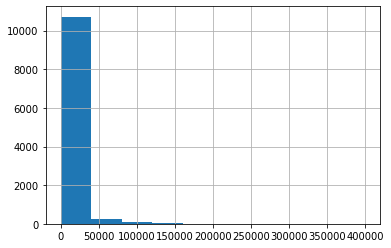

In [29]:
users.statuses_count[~null_statuses_count_ids].hist()
plt.show()

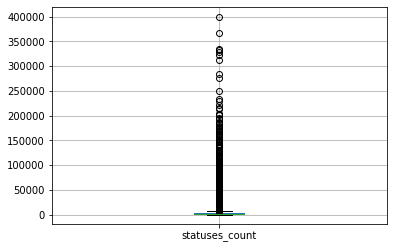

In [30]:
pd.DataFrame(users.statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

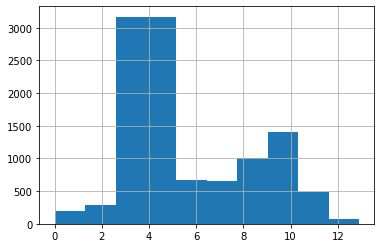

In [31]:
log_feature = pd.Series(np.log(users.statuses_count[~null_statuses_count_ids] + 1))
log_feature.hist()

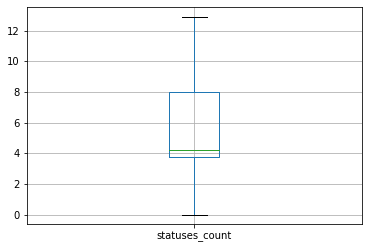

In [32]:
pd.DataFrame(log_feature).boxplot()
plt.show()

### Normal Users

In [33]:
nobot_users = users[users.bot==0]

null_statuses_count_nobot_ids = nobot_users.statuses_count.isna()
nobot_users.statuses_count[~null_statuses_count_nobot_ids].describe()

count      4993.000000
mean      11638.219107
std       26719.438432
min           0.000000
25%          61.000000
50%        2041.000000
75%       11585.000000
max      399555.000000
Name: statuses_count, dtype: float64

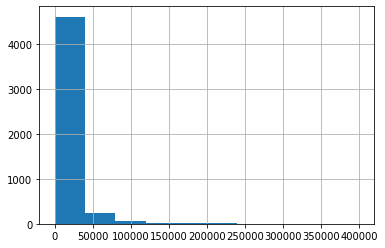

In [34]:
nobot_users.statuses_count[~null_statuses_count_nobot_ids].hist()
plt.show()

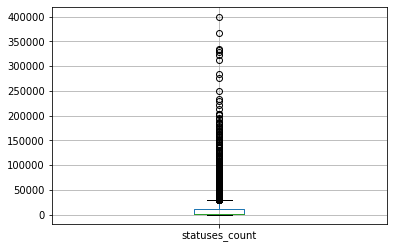

In [35]:
pd.DataFrame(nobot_users.statuses_count[~null_statuses_count_nobot_ids]).boxplot()
plt.show()

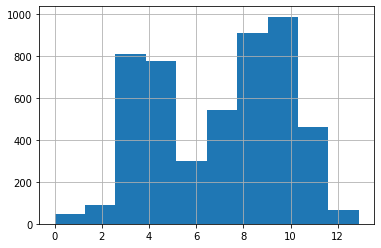

In [36]:
log_feature_nobot = pd.Series(np.log(nobot_users.statuses_count[~null_statuses_count_nobot_ids] + 1))
log_feature_nobot.hist()
plt.show()

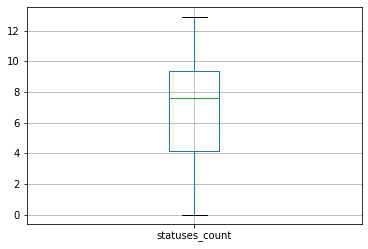

In [37]:
pd.DataFrame(log_feature_nobot).boxplot()
plt.show()

Number of Statuses count Nan for Non Bots:  399
count    5392.000000
mean        6.989525
std         2.678152
min         0.000000
25%         4.189655
50%         7.176255
75%         9.225894
max        12.898109
Name: statuses_count, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


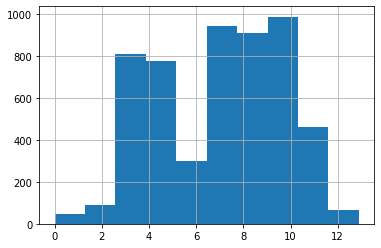

In [38]:
# remove Nan element
print("Number of Statuses count Nan for Non Bots: ", np.sum(null_statuses_count_nobot_ids))

median = np.floor(log_feature_nobot.median())

nobot_users.loc[~null_statuses_count_nobot_ids, "statuses_count"] = log_feature_nobot
nobot_users.loc[null_statuses_count_nobot_ids, "statuses_count"] = median

users.loc[users.bot==0, "statuses_count"] = nobot_users.statuses_count

print(users.loc[users.bot==0, "statuses_count"].describe())

users.loc[users.bot==0, "statuses_count"].hist()
plt.show()

### Bot

In [39]:
bot_users = users[users.bot==1]

null_statuses_count_bot_ids = bot_users.statuses_count.isna()
bot_users.statuses_count[~null_statuses_count_bot_ids].describe()

count      6116.000000
mean       1185.102845
std        5373.550630
min           0.000000
25%          32.000000
50%          53.000000
75%          78.000000
max      214410.000000
Name: statuses_count, dtype: float64

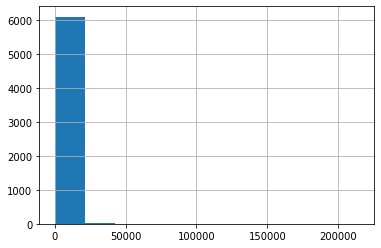

In [40]:
bot_users.statuses_count[~null_statuses_count_bot_ids].hist()
plt.show()

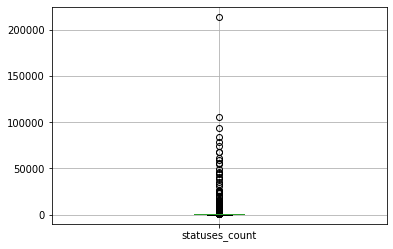

In [41]:
pd.DataFrame(bot_users.statuses_count[~null_statuses_count_bot_ids]).boxplot()
plt.show()

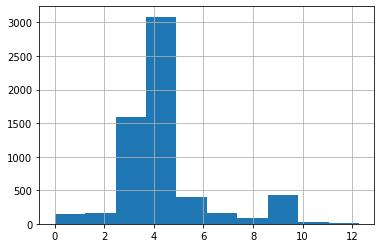

In [42]:
log_feature_bot = pd.Series(np.log(bot_users.statuses_count[~null_statuses_count_bot_ids] + 1))
log_feature_bot.hist()
plt.show()

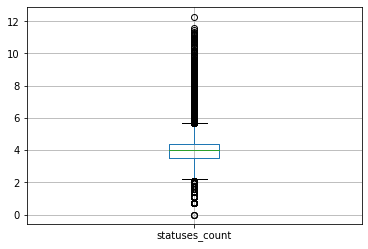

In [43]:
pd.DataFrame(log_feature_bot).boxplot()
plt.show()

# we can see that there are some outliers

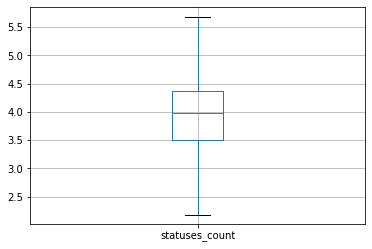

In [44]:
# removing outliers 
IQR = log_feature_bot.quantile(0.75) - log_feature_bot.quantile(0.25)
outlier_1 = log_feature_bot.quantile(0.75) + 1.5*IQR
outlier_2 = log_feature_bot.quantile(0.25) - 1.5*IQR

log_feature_bot[log_feature_bot > outlier_1] = outlier_1
log_feature_bot[log_feature_bot < outlier_2] = outlier_2

pd.DataFrame(log_feature_bot).boxplot()
plt.show()

Number of Statuses count Nan for Bots:  0
count    6116.000000
mean       88.067366
std        92.332466
min         7.909313
25%        32.000000
50%        53.000000
75%        78.000000
max       291.615157
Name: statuses_count, dtype: float64


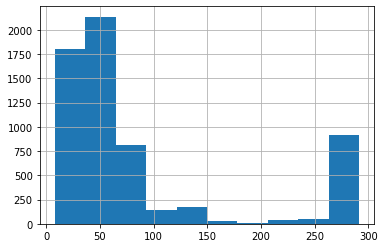

In [45]:
print("Number of Statuses count Nan for Bots: ", np.sum(null_statuses_count_bot_ids))

users.loc[users.bot==1, "statuses_count"] = np.exp(log_feature_bot) - 1

print(users.loc[users.bot==1, "statuses_count"].describe())

users.loc[users.bot==1, "statuses_count"].hist()
plt.show()

In [46]:
users.statuses_count = users.statuses_count.astype(int)

In [47]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            11508 non-null  object
 1   lang            11508 non-null  object
 2   bot             11508 non-null  int64 
 3   created_at      11508 non-null  object
 4   statuses_count  11508 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 797.5+ KB


# Tweets

In [48]:
tweets = pd.read_csv("dataset/tweets.csv", index_col=0)

In [49]:
tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [50]:
tweets.shape

(13664696, 9)

In [51]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 1.0+ GB


In [52]:
# we can see the percentage of NaN element of the columns of the tweets
nan_element = np.sum(tweets.isna())
total_element = tweets.shape[0]

print("Number of NaN element in the non numeric indexed tweets: ", nan_element)
print("Total Number of element in the non numeric indexed tweets: ", total_element)

ratio_per_column = nan_element/total_element

print("Ratio of the Nan elements per column: ", ratio_per_column)

print("Ratio of the Nan elements: ", ratio_per_column.mean())

Number of NaN element in the non numeric indexed tweets:  user_id            217283
retweet_count      437134
reply_count        647878
favorite_count     647542
num_hashtags      1057524
num_urls           648623
num_mentions       854165
created_at              0
text               537721
dtype: int64
Total Number of element in the non numeric indexed tweets:  13664696
Ratio of the Nan elements per column:  user_id           0.015901
retweet_count     0.031990
reply_count       0.047413
favorite_count    0.047388
num_hashtags      0.077391
num_urls          0.047467
num_mentions      0.062509
created_at        0.000000
text              0.039351
dtype: float64
Ratio of the Nan elements:  0.041045512058551795


## Index

In [53]:
# see the distribution of the lenght of the index
vlen = np.vectorize(lambda x: len(str(x)))
indexes = pd.Series(vlen(tweets.index.to_numpy()))

In [54]:
indexes.value_counts()
del indexes

In [55]:
# drop duplicated rows, dropping the row that have all the values duplicated not only the id
tweets = tweets.drop_duplicates()

In [56]:
tweets.shape

(11712093, 9)

In [57]:
print(f"removed rows : {13664696 - 11712093}")

removed rows : 1952603


In [58]:
index_value_counts = tweets.index.value_counts()
print(index_value_counts)

dmy                   14
qsa                   12
mxo                   11
nis                   11
rdw                   11
                      ..
472403921332613120     1
583261659797426176     1
361607898599657473     1
582869903788634113     1
486479812614451200     1
Name: id, Length: 11671631, dtype: int64


In [59]:
tweets.loc["dmy"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
dmy,2882736641,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-24 17:07:08,NaN
dmy,138492664,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-29 13:07:05,NaN
dmy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 01:52:25,NaN
dmy,467136996,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-17 06:21:50,NaN
dmy,816485959,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-09 17:24:53,NaN
dmy,531252639,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-08 21:28:02,NaN
dmy,520977237,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-06 01:58:36,NaN
dmy,535901760,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-06 04:07:20,NaN
dmy,2351661655,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07 04:55:39,NaN


In [60]:
# we can see strange entries for non numerical indexes, try to eliminate them
numerical_indexes_ids = pd.Series(tweets.index.str.isnumeric())

In [61]:
numerical_indexes_ids[numerical_indexes_ids.isna()] = False

In [62]:
# we can see the percentage of NaN element of the non numerical indexes
nan_element = np.sum(tweets[numerical_indexes_ids.to_numpy()].isna())
total_element = tweets[numerical_indexes_ids.to_numpy()].shape[0]

print("Number of NaN element in the non numeric indexed tweets: ", nan_element)
print("Total Number of element in the non numeric indexed tweets: ", total_element)

ratio_per_column = nan_element/total_element

print("Ratio of the Nan elements per column: ", ratio_per_column)

print("Ratio of the Nan elements: ", ratio_per_column.mean())

# the percentage of the Nan elements is too much, we can't drop that rows

Number of NaN element in the non numeric indexed tweets:  user_id           188364
retweet_count     342974
reply_count       496271
favorite_count    496378
num_hashtags      804930
num_urls          497125
num_mentions      650170
created_at             0
text              397261
dtype: int64
Total Number of element in the non numeric indexed tweets:  11278233
Ratio of the Nan elements per column:  user_id           0.016702
retweet_count     0.030410
reply_count       0.044003
favorite_count    0.044012
num_hashtags      0.071370
num_urls          0.044078
num_mentions      0.057648
created_at        0.000000
text              0.035224
dtype: float64
Ratio of the Nan elements:  0.03816075522547627


In [63]:
# we can see the percentage of NaN element of the non unique indexes
duplicated_index = index_value_counts[index_value_counts > 1].index.to_numpy()

nan_element = np.sum(tweets.loc[duplicated_index].isna())
total_element = tweets.loc[duplicated_index].shape[0]

print("Number of NaN element in the non unique indexed tweets: ", nan_element)
print("Total Number of element in the non unique indexed tweets: ", total_element)

ratio_per_column = nan_element/total_element

print("Ratio of the Nan elements per column: ", ratio_per_column)

print("Ratio of the Nan elements: ", ratio_per_column.mean())

# the percentage of the Nan elements is very high, we can drop that rows

Number of NaN element in the non unique indexed tweets:  user_id            3847
retweet_count     25452
reply_count       38934
favorite_count    38805
num_hashtags      52393
num_urls          38820
num_mentions      47294
created_at            0
text              37501
dtype: int64
Total Number of element in the non unique indexed tweets:  58060
Ratio of the Nan elements per column:  user_id           0.066259
retweet_count     0.438374
reply_count       0.670582
favorite_count    0.668360
num_hashtags      0.902394
num_urls          0.668619
num_mentions      0.814571
created_at        0.000000
text              0.645901
dtype: float64
Ratio of the Nan elements:  0.5416733647184904


In [64]:
del numerical_indexes_ids
del index_value_counts

In [65]:
tweets = tweets.drop(duplicated_index)
del duplicated_index

In [66]:
tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


## User_id

In [67]:
tweets.user_id.value_counts()

491630583     3929
497404180     3919
1693274954    3906
157029836     3903
164940888     3903
              ... 
jjxslowggo       1
vagr             1
mvys             1
h7lhx            1
tzn9s6bwj        1
Name: user_id, Length: 218593, dtype: int64

In [68]:
unique_user_id = tweets.user_id.unique()
print(len(unique_user_id))

218594


In [69]:
numeric_user_id = pd.Series(tweets.user_id.str.isnumeric())
numeric_user_id[numeric_user_id.isna()] = False

# valid_ids = numeric_user_id

In [70]:
print(f"numerical ids {np.sum(numeric_user_id)}")

numerical ids 11227784


In [71]:
tweets = tweets[numeric_user_id]

del numeric_user_id
del unique_user_id

In [72]:
np.nan

nan

In [73]:
# remove tweets whose user are not in the users dataset

numeric_user_id = pd.to_numeric(tweets.user_id, errors="coerce")

tweets = tweets[numeric_user_id.isin(users.index)]

In [74]:
tweets.shape

(11226977, 9)

In [75]:
# function to handle non negative numerical values and outliers

def function_handle_nnn(feature_name = None, upperscale_bound=1e7, quantile_outlier=0.9):
    
    print(f"Feature: {feature_name}")
    
    # valid numbers
    numerical_entries = pd.Series(tweets[feature_name].str.isnumeric())
    numerical_entries[numerical_entries.isna()] = False
    
    numerical_entries = numerical_entries.astype(bool)

    numeric_count = pd.to_numeric(tweets[feature_name], errors="coerce")

    numeric_count.replace(float("inf"), np.nan, inplace=True)
    numeric_count = numeric_count.apply(lambda x: x if x >= 0 else np.nan)
    numeric_count[~numerical_entries] = np.nan

    # remove float elements

    numeric_count_rounds = numeric_count.round()
    numeric_count[numeric_count_rounds == numeric_count] = numeric_count_rounds[numeric_count_rounds == numeric_count].astype(int)
    numeric_count[numeric_count_rounds != numeric_count] = np.nan
    
    tweets[feature_name] = numeric_count

    del numeric_count_rounds
    del numeric_count

    # remove the NaN elements, by compute the overall median of the feature

    # na_ids_count = tweets[feature_name].isna()
    
    # median = tweets.loc[~na_ids_count, feature_name].median()
    # tweets.loc[na_ids_count, feature_name] = median

    # del na_ids_count

    # remove the NaN elements, by compute the median conditioned by the user_id of the tweet
    tweets[feature_name].fillna(tweets.groupby(["user_id"])[feature_name].transform(lambda x: np.floor(np.nanmedian(x))), inplace=True)

    tweets.loc[tweets[feature_name].isna(), feature_name] = np.floor(tweets[feature_name].median())
        
    # remove over upper bound numbers
    tweets.loc[tweets[feature_name]>upperscale_bound, feature_name] = 0 # upperscale_bound
    
    # transform powerlaw distr with log(x + 1)
    log_transformed = tweets[feature_name].apply(lambda x: np.log(x + 1))
    
    # print statistics
    print("Histogram - with outliers:")
    tweets[feature_name].hist()
    plt.show()
    
    print("box plot - with outliers:")
    pd.DataFrame(tweets[feature_name]).boxplot()
    plt.show()
    
    print("Histogram log - with outliers:")
    log_transformed.hist()
    plt.show()
    
    print("box plot log - with outliers:")
    pd.DataFrame(log_transformed).boxplot()
    plt.show()

    # remove outliers
    quantile = log_transformed.quantile(quantile_outlier)   
    print(f"{quantile_outlier}-quantile log : ", quantile)
    print(f"{quantile_outlier}-quantile : ", np.exp(quantile) - 1)
    log_transformed[log_transformed>quantile] = np.nan
    
    tweets[feature_name] = log_transformed.apply(lambda x: np.exp(x) - 1)

    # remove the NaN elements, by compute the median conditioned by the user_id of the tweet
    tweets[feature_name].fillna(tweets.groupby(["user_id"])[feature_name].transform(lambda x: np.floor(np.nanmedian(x))), inplace=True)

    tweets.loc[tweets[feature_name].isna(), feature_name] = np.floor(tweets[feature_name].median())
    
    tweets[feature_name] = tweets[feature_name].astype(int)

    # print statistics
    print("Histogram - removed outliers:")
    tweets[feature_name].hist()
    plt.show()
    
    print("box plot - removed outliers:")
    pd.DataFrame(tweets[feature_name]).boxplot()
    plt.show()
    
    print("Histogram log - removed outliers:")
    log_transformed.hist()
    plt.show()
    
    print("box plot log - removed outliers:")
    pd.DataFrame(log_transformed).boxplot()
    plt.show()

    print("Finished", end="\n")
    
    del log_transformed
    
    value_counts = tweets[feature_name].value_counts()
    print("Value counts:")
    print(value_counts, end="\n")

## Retweet_count

Feature: retweet_count
Histogram - with outliers:


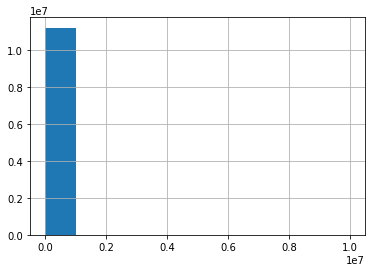

box plot - with outliers:


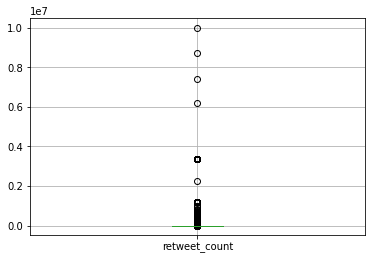

Histogram log - with outliers:


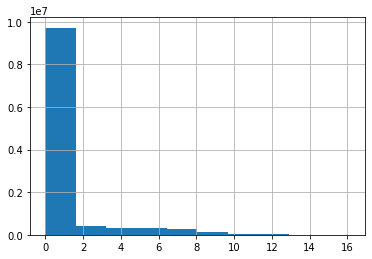

box plot log - with outliers:


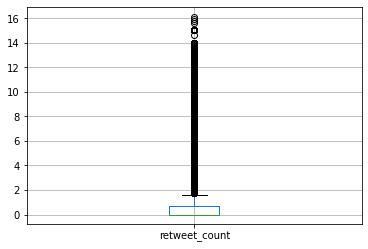

0.95-quantile log :  5.986452005284438
0.95-quantile :  397.0


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Histogram - removed outliers:


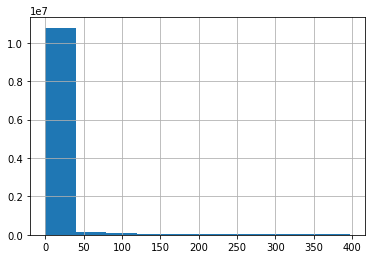

box plot - removed outliers:


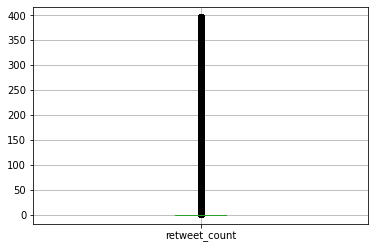

Histogram log - removed outliers:


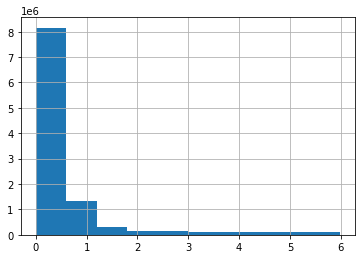

box plot log - removed outliers:


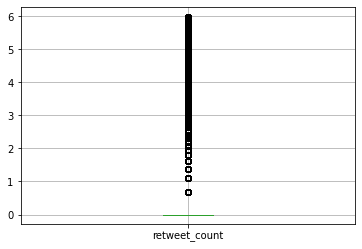

Finished
Value counts:
0     8560935
1     1117650
2      315236
3      259642
5      121252
       ...   
27         90
4          45
79         34
66         25
7           8
Name: retweet_count, Length: 306, dtype: int64


In [76]:
function_handle_nnn("retweet_count", quantile_outlier=0.95)

## reply count

Feature: reply_count
Histogram - with outliers:


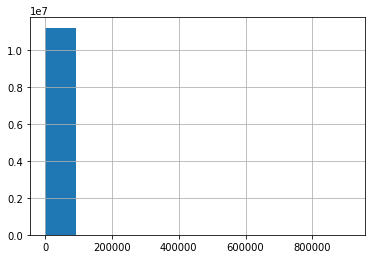

box plot - with outliers:


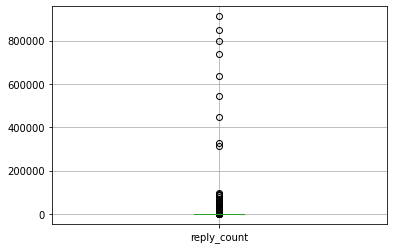

Histogram log - with outliers:


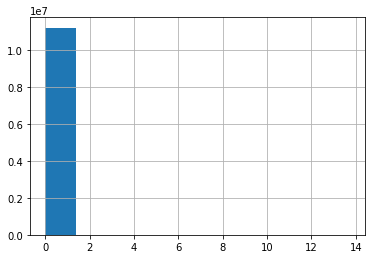

box plot log - with outliers:


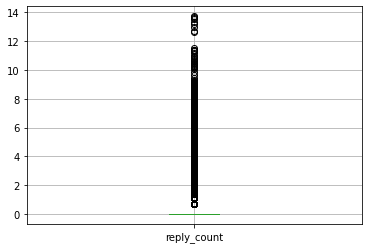

0.99995-quantile log :  4.927253685157205
0.99995-quantile :  137.00000000000006
Histogram - removed outliers:


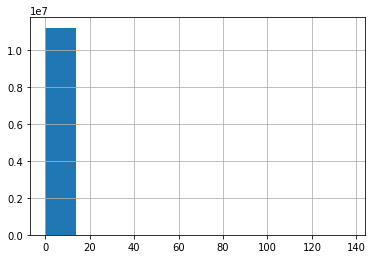

box plot - removed outliers:


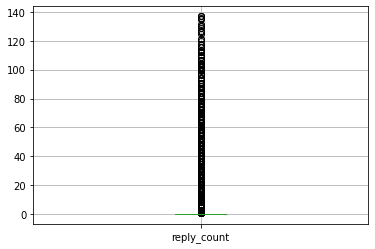

Histogram log - removed outliers:


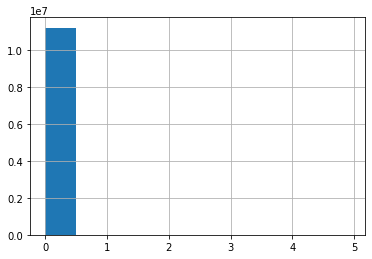

box plot log - removed outliers:


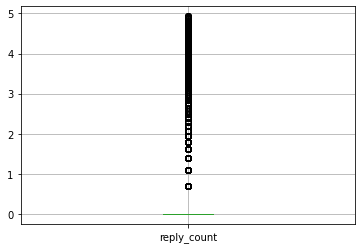

Finished
Value counts:
0      11210420
1         13189
2          1208
3           631
5           284
         ...   
127           1
80            1
99            1
105           1
132           1
Name: reply_count, Length: 99, dtype: int64


In [77]:
function_handle_nnn("reply_count", 1e6, quantile_outlier=0.99995)

## Favorite count

Feature: favorite_count
Histogram - with outliers:


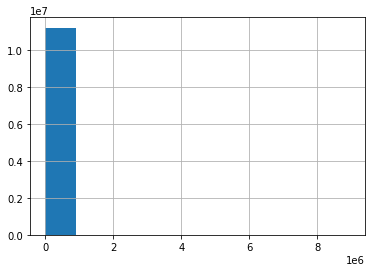

box plot - with outliers:


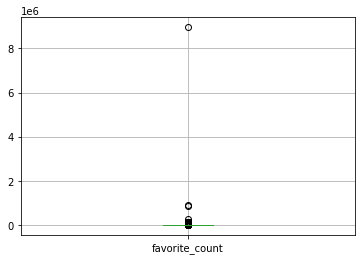

Histogram log - with outliers:


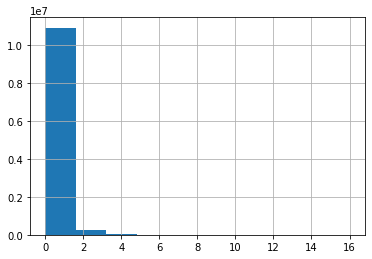

box plot log - with outliers:


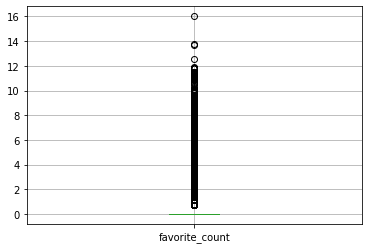

0.999-quantile log :  3.784189633918261
0.999-quantile :  42.99999999999999
Histogram - removed outliers:


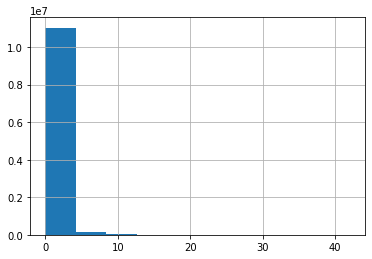

box plot - removed outliers:


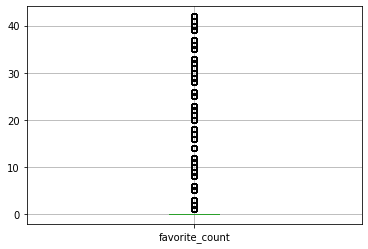

Histogram log - removed outliers:


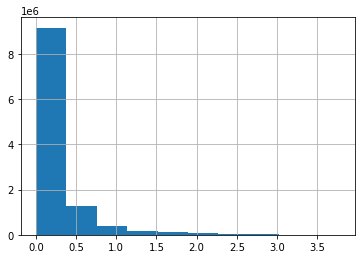

box plot log - removed outliers:


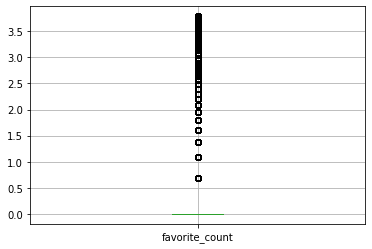

Finished
Value counts:
0     9156712
1     1257255
2      367723
3      244228
5       86438
6       23313
8       16458
9       12379
12      10518
10       9308
14       7965
11       7137
16       4908
31       3063
23       2117
26       2083
17       1953
18       1682
25       1467
20       1447
21       1408
22       1127
33        913
35        812
28        677
29        663
30        587
42        523
32        499
36        411
39        324
37        310
40        299
41        270
Name: favorite_count, dtype: int64


In [78]:
function_handle_nnn("favorite_count", quantile_outlier=0.999)

## num hashtags

Feature: num_hashtags
Histogram - with outliers:


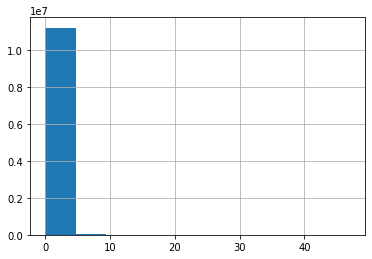

box plot - with outliers:


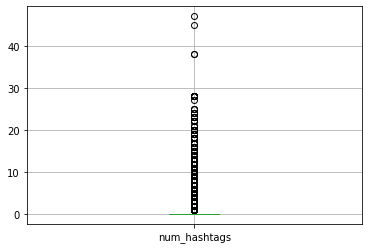

Histogram log - with outliers:


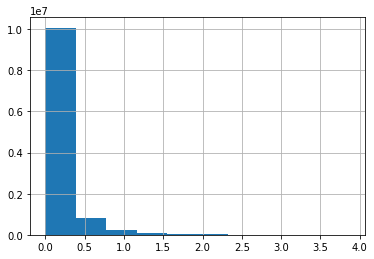

box plot log - with outliers:


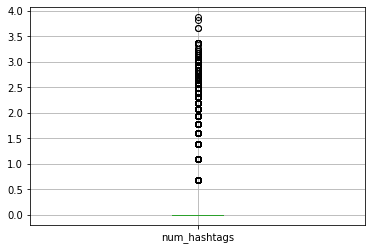

0.9999-quantile log :  2.3978952727983707
0.9999-quantile :  10.000000000000002
Histogram - removed outliers:


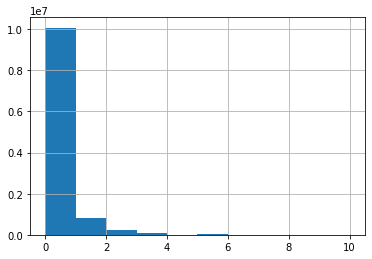

box plot - removed outliers:


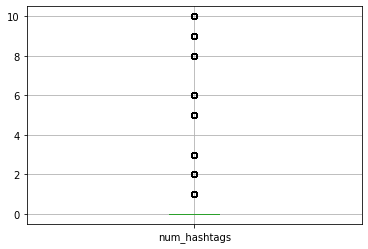

Histogram log - removed outliers:


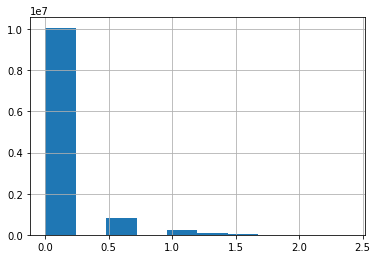

box plot log - removed outliers:


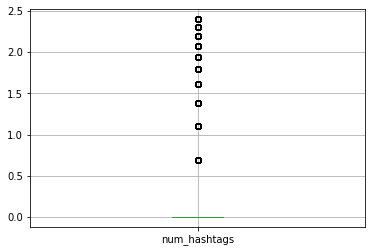

Finished
Value counts:
0     10069026
1       794719
2       231029
3       101663
5        21395
6         4351
8         2328
9         1580
10         886
Name: num_hashtags, dtype: int64


In [79]:
function_handle_nnn("num_hashtags", 50, quantile_outlier=0.9999)

## Num urls

Feature: num_urls
Histogram - with outliers:


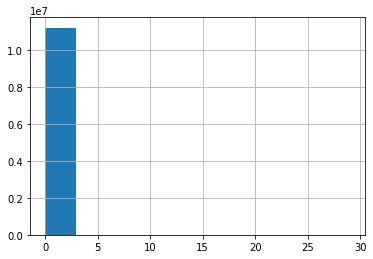

box plot - with outliers:


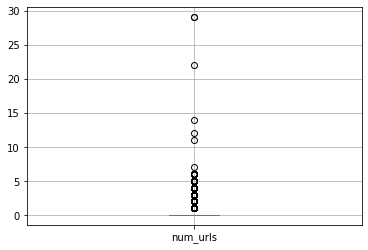

Histogram log - with outliers:


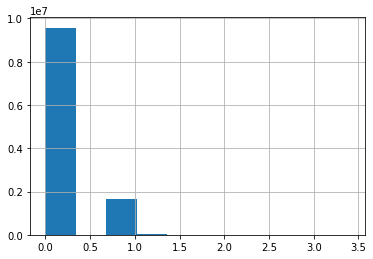

box plot log - with outliers:


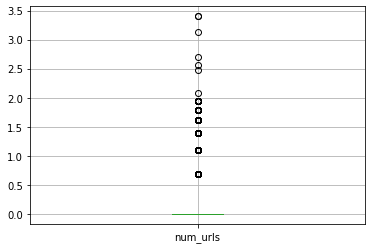

0.999995-quantile log :  1.791759469228055
0.999995-quantile :  5.0
Histogram - removed outliers:


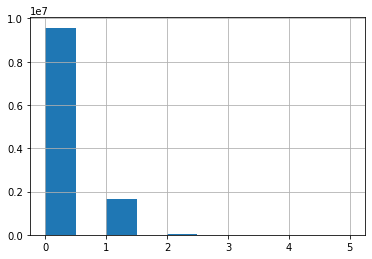

box plot - removed outliers:


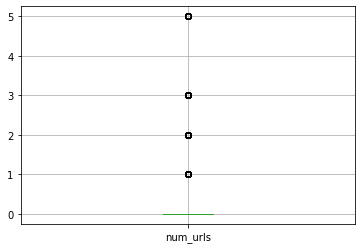

Histogram log - removed outliers:


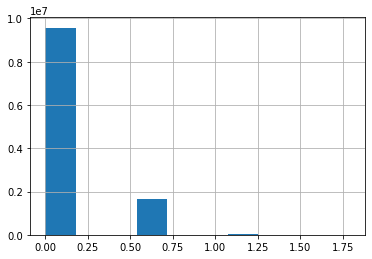

box plot log - removed outliers:


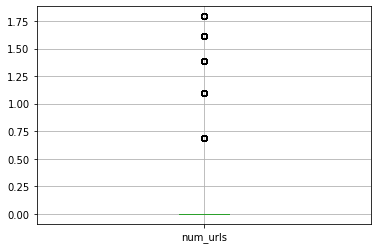

Finished
Value counts:
0    9568627
1    1637166
2      20095
3       1037
5         52
Name: num_urls, dtype: int64


In [80]:
function_handle_nnn("num_urls", 30, quantile_outlier=0.999995)

## Num mentions

Feature: num_mentions
Histogram - with outliers:


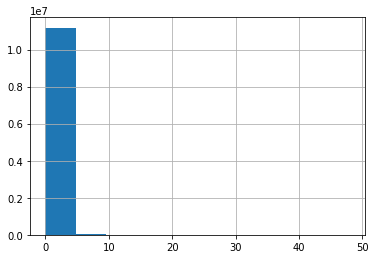

box plot - with outliers:


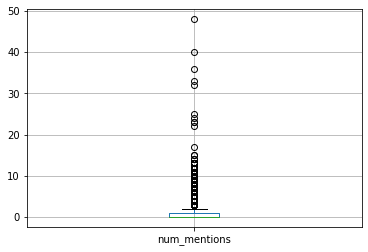

Histogram log - with outliers:


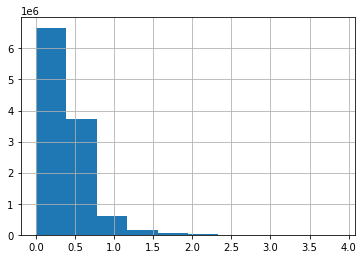

box plot log - with outliers:


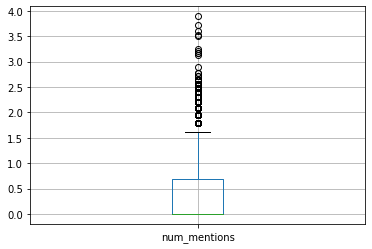

0.99995-quantile log :  2.4849066497880004
0.99995-quantile :  11.0
Histogram - removed outliers:


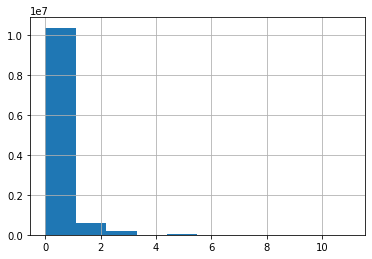

box plot - removed outliers:


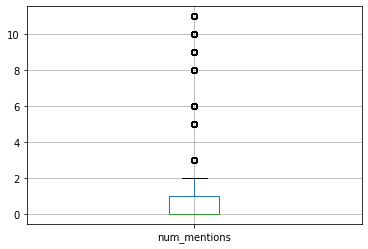

Histogram log - removed outliers:


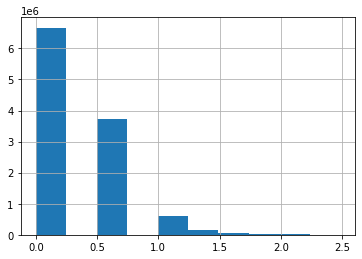

box plot log - removed outliers:


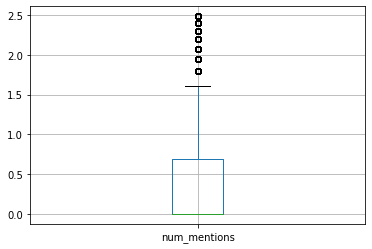

Finished
Value counts:
0     6664143
1     3724727
2      598133
3      191114
5       32722
6        6632
8        4452
9        2801
10       1653
11        600
Name: num_mentions, dtype: int64


In [81]:
function_handle_nnn("num_mentions", 50, quantile_outlier=0.99995)

## numerical correlations

In [82]:
numerical_cols = ["retweet_count", "reply_count", "favorite_count", "num_hashtags", "num_urls", "num_mentions"]

In [83]:
tweets[numerical_cols].sample(10000).corr()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
retweet_count,1.000000,0.075765,-0.017106,0.058517,0.006197,0.141375
reply_count,0.075765,1.000000,0.030997,-0.001480,-0.001879,0.011117
favorite_count,-0.017106,0.030997,1.000000,-0.007712,-0.074191,-0.052669
num_hashtags,0.058517,-0.001480,-0.007712,1.000000,0.097582,0.096296
num_urls,0.006197,-0.001879,-0.074191,0.097582,1.000000,-0.065059
num_mentions,0.141375,0.011117,-0.052669,0.096296,-0.065059,1.000000


## Created at

In [84]:
nan_created_at_ids = tweets.created_at.isna()
print("Number of NaN in created_at feature: ", np.sum(nan_created_at_ids))


tweets = tweets[~nan_created_at_ids]

Number of NaN in created_at feature:  0


In [85]:
try:
    dates = pd.to_datetime(tweets.created_at, format='%Y-%m-%d %H:%M:%S', errors='raise')
        
    print("All the dates are ok!")
except ValueError as e:
    print(e)

All the dates are ok!


In [86]:
tweets.created_at.dtype

dtype('O')

In [87]:
# prima della creazione di tweetter
tweets.created_at.min()

'1953-04-17 12:24:33'

In [88]:
# nel futuro
tweets.created_at.max()

'2040-04-27 11:03:25'

In [89]:
# substitute the wrong dates with a default one
default_date = "1800-01-01 00:00:00"

In [90]:
tweets.user_id = tweets.user_id.astype(int)

users["user_id"] = users.index

joined = tweets[["user_id", "created_at"]].join(other=users[["user_id", "created_at"]], on="user_id", how="left", lsuffix='_tweet', rsuffix='_user').loc[:, ["created_at_tweet", "created_at_user"]]

del users["user_id"]

In [91]:
joined.shape

(11226977, 2)

In [92]:
joined.head()

,created_at_tweet,created_at_user
id,,
509354017856950272,2019-09-11 14:53:55,2016-07-03 02:37:46
583002592529121280,2020-04-01 20:27:04,2016-07-13 00:06:28
461498835362013185,2019-05-02 13:34:31,2019-03-11 03:36:43
528808127366692864,2019-11-04 07:17:37,2017-01-18 05:40:50
575336690904006656,2020-03-11 16:45:31,2018-04-17 22:50:24


In [93]:
wrong_datas = joined.created_at_tweet < joined.created_at_user

joined.loc[wrong_datas, "created_at_tweet"] = default_date

In [94]:
tweets.loc[:, "created_at"] = joined.loc[:, "created_at_tweet"]

In [95]:
del joined

In [96]:
# change future data with '2022-01-01 00:00:00'
newest = pd.to_datetime("2022-01-01 00:00:00", format='%Y-%m-%d %H:%M:%S')

tweets.loc[dates>newest, "created_at"] = default_date

del dates

In [97]:
tweets.created_at.min()

'1800-01-01 00:00:00'

In [98]:
tweets.created_at.max()

'2020-05-03 10:36:12'

## Text

In [99]:
nan_text_ids = tweets.text.isna()
print("Number of number of NaN tweets: ", np.sum(nan_text_ids))

Number of number of NaN tweets:  384406


In [100]:
# substitute the NaN tweets with the empty string ""
tweets.loc[nan_text_ids, "text"] = ""

In [101]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11226977 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   retweet_count   int64 
 2   reply_count     int64 
 3   favorite_count  int64 
 4   num_hashtags    int64 
 5   num_urls        int64 
 6   num_mentions    int64 
 7   created_at      object
 8   text            object
dtypes: int64(7), object(2)
memory usage: 856.6+ MB


In [102]:
tweets.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.122698e+07,1.122698e+07,1.122698e+07,1.122698e+07,1.122698e+07,1.122698e+07,1.122698e+07
mean,8.316809e+08,6.906569e+00,4.861505e-03,4.118502e-01,1.546766e-01,1.497043e-01,5.149821e-01
std,8.530063e+08,3.554762e+01,4.218883e-01,1.658171e+00,5.521111e-01,3.626563e-01,7.705697e-01
min,6.780330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.328048e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.680803e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.232535e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,3.164942e+09,3.970000e+02,1.370000e+02,4.200000e+01,1.000000e+01,5.000000e+00,1.100000e+01


# Save to file

In [103]:
users.to_csv("cleaned_users.csv")

In [104]:
tweets.to_csv("cleaned_tweets.csv")